## 一、研究背景
## 二、目标
<font color= 'green'   face ='黑体'>建立一个能够预测基站能耗的模型，实现两个维度的输出，并且持续优化模型精度。</font>
#### 1.根据LTE、NR的话务量，预测LTE、NR的功耗；

#### 2.引入实际电费作为权重，预测整体基站的能耗、电费，指导稽核电费准确性；

#### 3.精细化设备、区域、环境温度、季节等因素，多向量提升模型精准度；

## 三、计划
#### <font color ='red'> 1.第一阶段只做基站的，（模型选型：采用pytorch逻辑回归多层网络、pytorch LSTM模型）</font>

#### <font color ='red'> 2.第二阶段做机房类的</font>
## 三、业务理解

<font color='red'>建立模型</font>，根据前期每个基站的能耗数据，和网络指标，预测后期基站的能耗情况。
根据能耗情况，引入实际电费作为权重，预测整体基站的能耗、电费，最后输出预测结果。

<font color='red'>建立web</font>,提供查询入口。

<font color='red'>应用场景一：</font>每月提供电费稽核使用。

<font color='red'>应用场景二：</font>根据模型预测结果，对比节能措施实施后的能耗，判断实际省电效果。

<font color= 'green'   face ='黑体'>建立一个能够预测基站能耗的模型，实现两个维度的输出，并且持续优化模型精度。</font>

## 四、数据准备

### （一）、LTE能耗数据准备
#### 1.华为区能耗数据2022年11月-2023年1月


In [1]:
#Import Required Package

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

# 深度学习框架pytorch
import torch
from torch import nn
from torch.utils import data
from torch.utils.data import DataLoader


ModuleNotFoundError: No module named 'seaborn'

In [32]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
torch.set_default_device(device)
torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [84]:
import torch
from torch.autograd import Variable

tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor,requires_grad = True)
#True是反向传播过程当中去

print(tensor)
print(variable)

t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable)

print(t_out)
print(v_out)

v_out.backward()
print(variable.grad)
print(variable)
print(variable.data)
print(variable.data.numpy())

tensor([[1., 2.],
        [3., 4.]], device='cpu')
tensor([[1., 2.],
        [3., 4.]], device='cpu', requires_grad=True)
tensor(7.5000, device='cpu')
tensor(7.5000, device='cpu', grad_fn=<MeanBackward0>)
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]], device='cpu')
tensor([[1., 2.],
        [3., 4.]], device='cpu', requires_grad=True)
tensor([[1., 2.],
        [3., 4.]], device='cpu')
[[1. 2.]
 [3. 4.]]


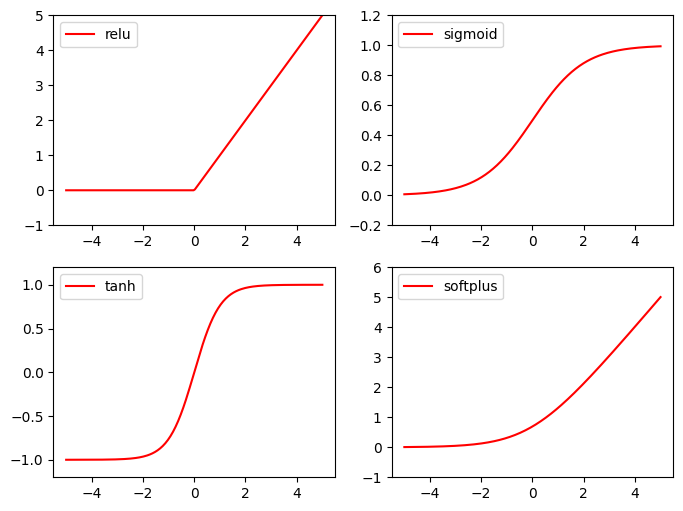

In [96]:
import torch.nn.functional as F 
import matplotlib.pyplot as plt

x = torch.linspace(-5,5,200)
x = Variable(x)
#print(x)
x_np = x.data.detach().cpu().numpy()

y_relu = F.relu(x).data.detach().cpu().numpy()
y_sigmoid = F.sigmoid(x).data.detach().cpu().numpy()
y_tanh = F.tanh(x).data.detach().cpu().numpy()
y_softplus = F.softplus(x).data.detach().cpu().numpy()

plt.figure(1,figsize=(8,6))
plt.subplot(221)
plt.plot(x_np,y_relu,c='red',label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(222)
plt.plot(x_np,y_sigmoid,c='red',label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(223)
plt.plot(x_np,y_tanh,c='red',label='tanh')
plt.ylim((-1.2,1.2))
plt.legend(loc='best')

plt.figure(1,figsize=(8,6))
plt.subplot(224)
plt.plot(x_np,y_softplus,c='red',label='softplus')
plt.ylim((-1,6))
plt.legend(loc='best')





In [97]:
import torch
import numpy as np

numpynums = np.arange(6).reshape(2,3)
tensor = torch.from_numpy(numpynums)
tensor2numpy = tensor.numpy()

print(numpynums)
print(tensor)
print(tensor2numpy)

[[0 1 2]
 [3 4 5]]
tensor([[0, 1, 2],
        [3, 4, 5]], device='cpu')
[[0 1 2]
 [3 4 5]]


In [98]:
data = [-2,-4,2,4]
tensor = torch.FloatTensor(data)

print(np.abs(data),
     torch.abs(tensor),
     np.mean(data),
     torch.mean(tensor))

[2 4 2 4] tensor([2., 4., 2., 4.], device='cpu') 0.0 tensor(0., device='cpu')


In [100]:
import torch
import torch.nn.functional as F #激励函数都在这
from torch.autograd import Variable

#做一些假数据来
x = torch.linspace(-5,5,200)
x = Variable(x)

x_np = x.data.detach().cpu().numpy()

#集中常用的激励函数
y_relu = F.relu(x).data.detach().cpu().numpy()
print(y_relu)



[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02512559 

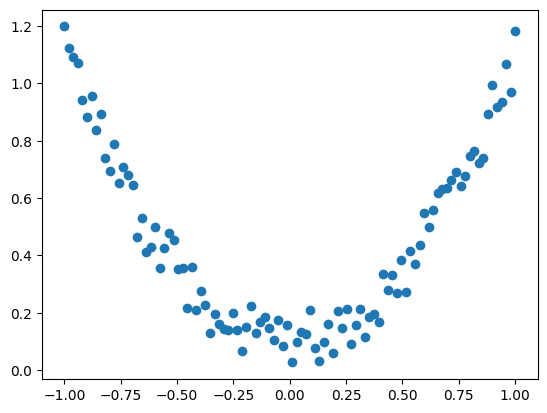

In [101]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

x1 = torch.linspace(-1,1,100)

x = torch.unsqueeze(x1,dim =1)
#print(x1)
#print(x)

y = x.pow(2) + 0.2*torch.rand(x.size())
 
plt.scatter(x.data.detach().cpu().numpy(),y.data.detach().cpu().numpy())


In [102]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(n_feature=1,n_hidden=10,n_output=1)

print(net)
        
        
        
        
        

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [103]:
optimizer = torch.optim.SGD(net.parameters(),lr =0.2)
loss_func = torch.nn.MSELoss()

for t in range(100):
    prediction = net(x)    
    loss = loss_func(prediction,y)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




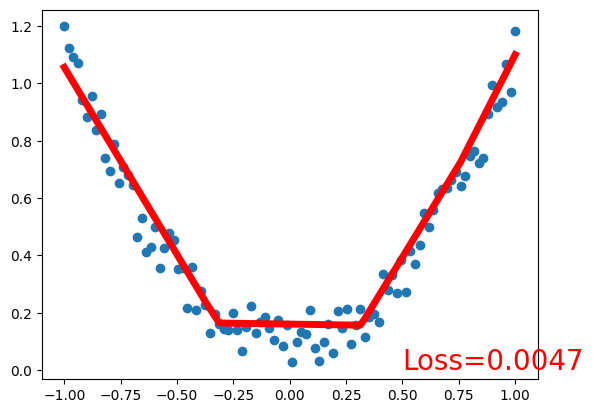

In [ ]:
import matplotlib.pyplot as plt
from IPython import display
import time

time_start=time.time()

x_list = []
y_list = []

def paintloss(loss,it):
    x_list.append(it)
    y_list.append(loss)
    display.clear_output(wait=True)
    plt.plot(x_list, y_list)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    #plt.pause(0.1) 

plt.ion()
plt.show()

for t in range(1000):
    prediction = net(x)    
    loss = loss_func(prediction,y)    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t% 5 == 0:
        plt.cla()
        display.clear_output(wait=True)
        plt.scatter(x.data.detach().cpu().numpy(),y.data.detach().cpu().numpy())
        plt.plot(x.data.detach().cpu().numpy(),prediction.data.detach().cpu().numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f' % loss.data.detach().cpu().numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
        #paintloss(loss.item(),t)
        
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(x.size(),y.size())
print(torch.get_num_threads())



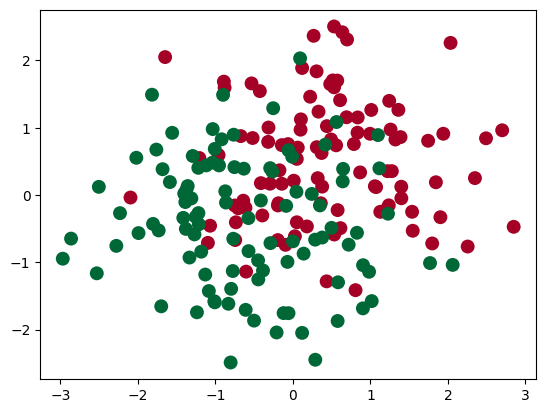

In [1]:
import torch
import matplotlib.pyplot as plt

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(0.5*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-0.5*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

plt.scatter(x.data.detach().cpu().numpy()[:, 0], x.data.detach().cpu().numpy()[:, 1], c=y.data.detach().cpu().numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()

# 画图
#plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [2]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=50, n_output=2) # 几个类别就几个 output

print(net)  # net 的结构
 


Net(
  (hidden): Linear(in_features=2, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=2, bias=True)
)


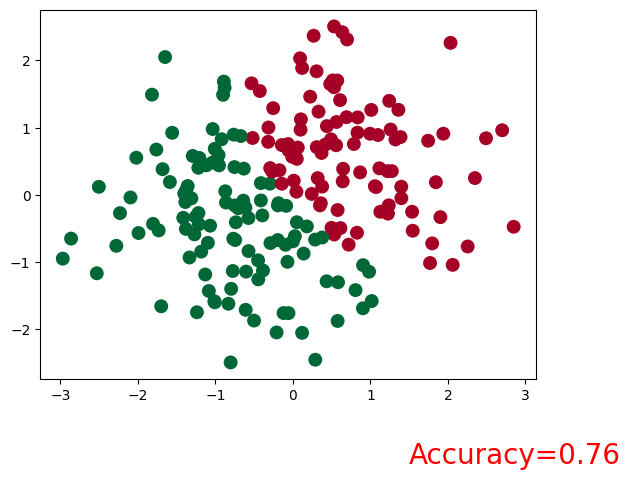

time cost 15.079716682434082 s
torch.Size([200, 2]) torch.Size([200])
32


In [3]:
import matplotlib.pyplot as plt
from IPython import display
import time
time_start=time.time()

# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()


plt.ion()   # 画图
 

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值    
    loss = loss_func(out, y)     # 计算两者的误差    
    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        display.clear_output(wait=True)
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()
 
        
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(x.size(),y.size())
print(torch.get_num_threads())